In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# 1. Load Dataset


In [7]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
print("Shape:", df.shape)
df.head()


Shape: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#  2. Select Relevant Features


In [8]:
features = ["Annual Income (k$)", "Spending Score (1-100)"]
X = df[features].copy()


# 3. Scaling


In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Finding Optimal K (Elbow Method)

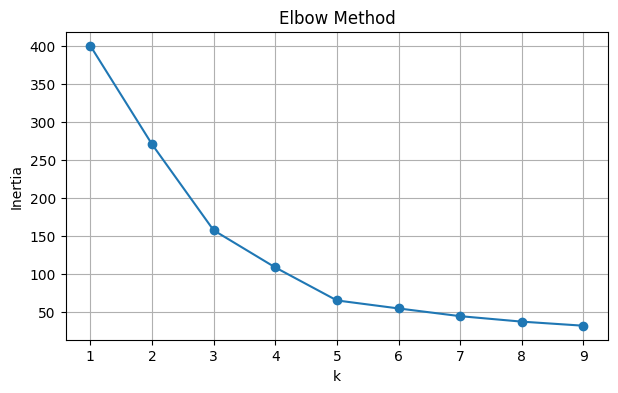

In [10]:
inertia = []
K = range(1, 10)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(7, 4))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.grid()
plt.show()

# 5. Train KMeans

In [11]:
k_optimal = 5 # as can be seen in graph

kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)

# 6. Compute Distance to Cluster Centers


In [12]:
centroids = kmeans.cluster_centers_

def distance_from_center(row, label):
    center = centroids[label]
    return np.linalg.norm(row - center)

df["distance_to_center"] = [
    distance_from_center(X_scaled[i], df["cluster"][i])
    for i in range(len(df))
]

#  7. Anomaly Threshold


In [13]:
threshold = np.percentile(df["distance_to_center"], 95)
df["anomaly"] = df["distance_to_center"] > threshold

print("Anomalies detected:", df["anomaly"].sum())

Anomalies detected: 10


# 8. Visualization


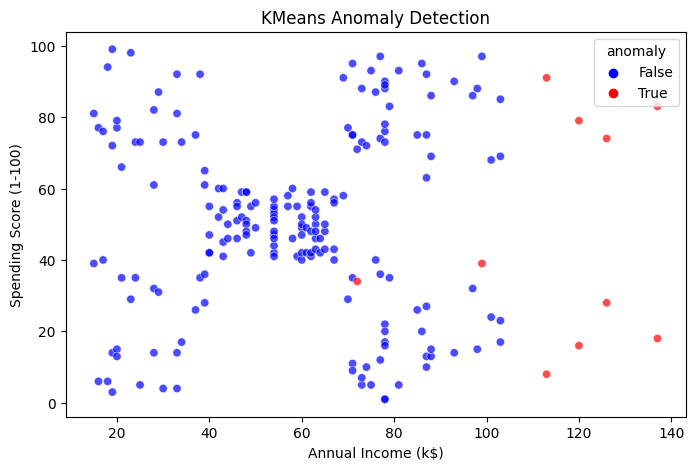

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x=features[0],
    y=features[1],
    hue="anomaly",
    palette={False:"blue", True:"red"},
    alpha=0.7
)
plt.title("KMeans Anomaly Detection")
plt.show()

# 9. Save results

In [15]:
df.to_csv("/kaggle/working/kmeans_anomaly_results.csv", index=False)
print("Saved: kmeans_anomaly_results.csv")

df.head()

Saved: kmeans_anomaly_results.csv


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,distance_to_center,anomaly
0,1,Male,19,15,39,2,0.824142,False
1,2,Male,21,15,81,3,0.414353,False
2,3,Female,20,16,6,2,0.699910,False
3,4,Female,23,16,77,3,0.382455,False
4,5,Female,31,17,40,2,0.821696,False
